# Neural Collaborative Filtering (Line Graph Comparison)
This notebook demonstrates a simple NCF model using Keras/TensorFlow and compares actual vs predicted ratings with a line graph.

In [1]:
# Load and preprocess data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load dataset
cols = ['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv('https://files.grouplens.org/datasets/movielens/ml-100k/u.data', sep='\t', names=cols)

# Encode user and movie
df['user'] = df['user_id'].astype("category").cat.codes.values
df['movie'] = df['movie_id'].astype("category").cat.codes.values
n_users = df['user'].nunique()
n_movies = df['movie'].nunique()

# Split data
X = df[['user', 'movie']].values
y = df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
# Build and train NCF model
embedding_size = 50
user_input = tf.keras.layers.Input(shape=(1,))
movie_input = tf.keras.layers.Input(shape=(1,))

user_embed = tf.keras.layers.Embedding(n_users, embedding_size)(user_input)
movie_embed = tf.keras.layers.Embedding(n_movies, embedding_size)(movie_input)

dot = tf.keras.layers.Dot(axes=2)([user_embed, movie_embed])
flatten = tf.keras.layers.Flatten()(dot)

model = tf.keras.Model([user_input, movie_input], flatten)
model.compile('adam', 'mse')
model.fit([X_train[:, 0], X_train[:, 1]], y_train, batch_size=64, epochs=5, verbose=0)

# Predict and evaluate
y_pred_ncf = model.predict([X_test[:, 0], X_test[:, 1]])
ncf_rmse = sqrt(mean_squared_error(y_test, y_pred_ncf))
ncf_mae = mean_absolute_error(y_test, y_pred_ncf)
print("NCF - RMSE:", ncf_rmse)
print("NCF - MAE:", ncf_mae)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
NCF - RMSE: 0.9485867755189253
NCF - MAE: 0.745063066482544


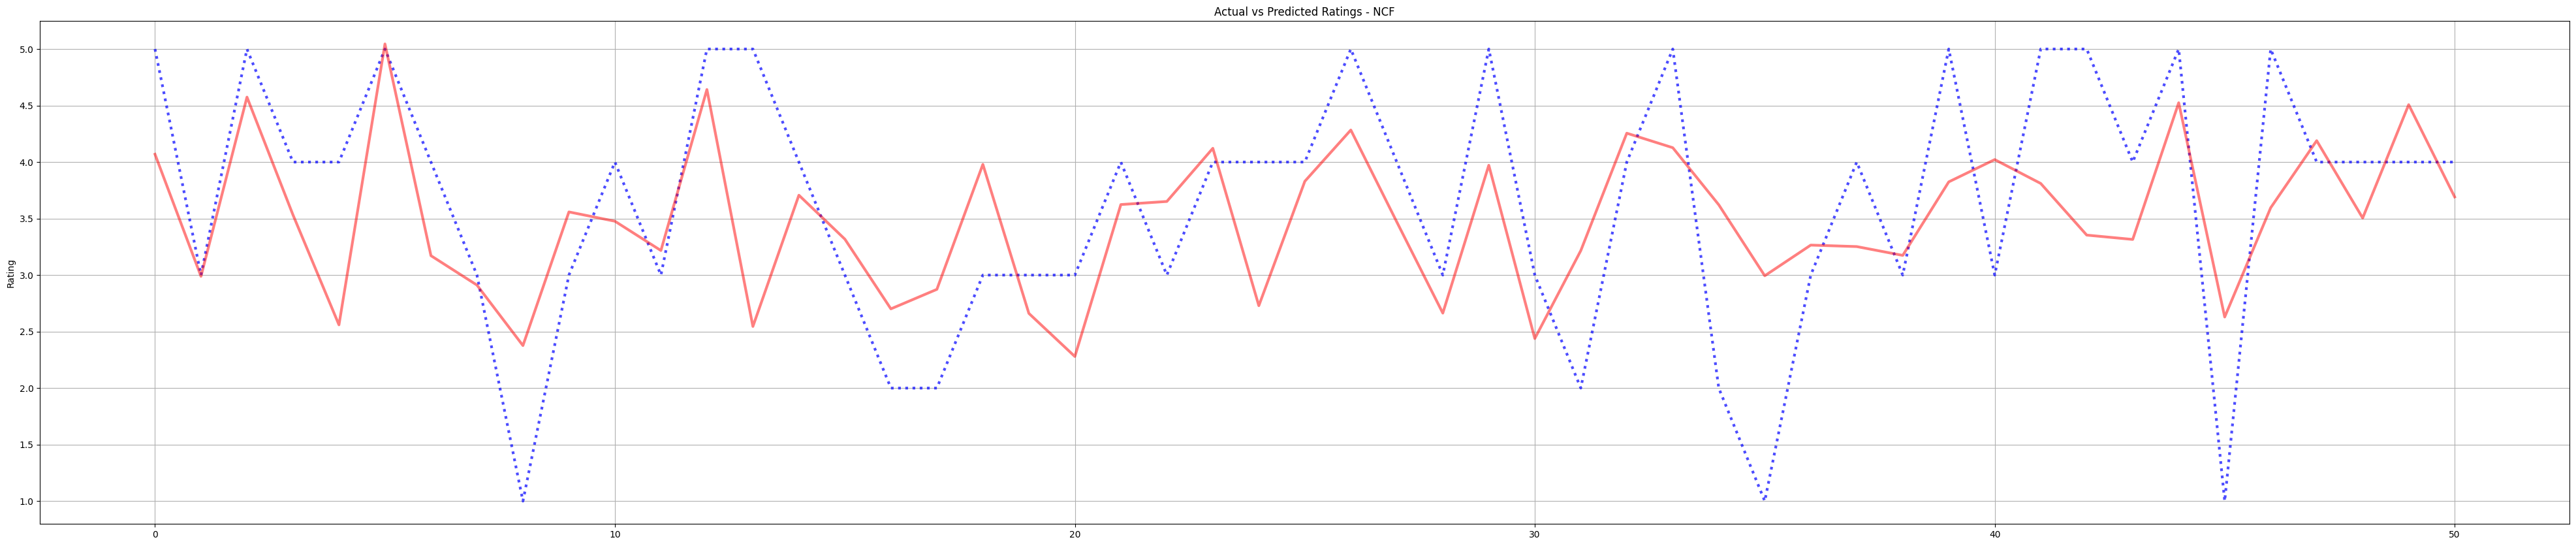

In [7]:
# Plotting actual vs predicted ratings (line graph)
plt.figure(figsize=(50, 10))
plt.plot(y_test[50:101], label='Actual Ratings', linewidth=3.0, linestyle='dotted', color='blue', alpha=0.7)
plt.plot(y_pred_ncf[50:101], label='Predicted Ratings', linewidth=3.0, linestyle='solid', color='red', alpha=0.5)
plt.title('Actual vs Predicted Ratings - NCF')
plt.ylabel('Rating')
plt.grid(True)
plt.show()
